# State-space analysis demonstration

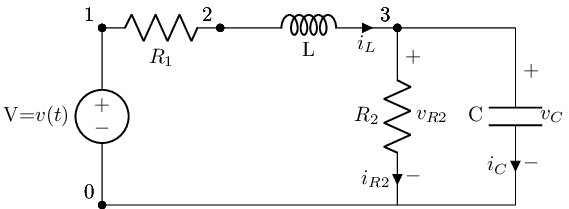

In [1]:
from lcapy import Circuit
cct = Circuit(netlist=
"""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right
""")
cct.draw(svg=True)

### Create state-space model

In [2]:
ss=cct.ss

### State-variable vector

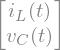

In [3]:
ss.x

### Independent source vector

In [4]:
ss.u

### Output vector for node voltages

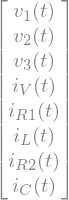

In [5]:
ss.y

### State-space state equations

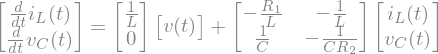

In [6]:
ss.state_equations()

### State-space output equations for the node voltages

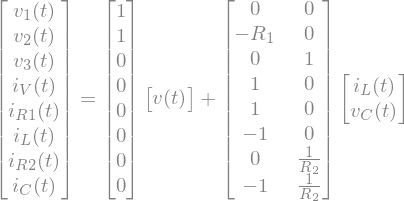

In [7]:
ss.output_equations()

### Characteristic (system) polynomial

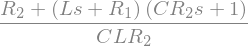

In [8]:
ss.P

### Eigenvalues

In [9]:
ss.eigenvalues

⎡                   ___________________________________________               
⎢                  ╱  2   2   2                         2    2                
⎢  C⋅R₁⋅R₂ + L   ╲╱  C ⋅R₁ ⋅R₂  - 2⋅C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L      C⋅R₁⋅R₂ + L
⎢- ─────────── - ──────────────────────────────────────────────, - ───────────
⎣    2⋅C⋅L⋅R₂                       2⋅C⋅L⋅R₂                         2⋅C⋅L⋅R₂ 

      ___________________________________________⎤
     ╱  2   2   2                         2    2 ⎥
   ╲╱  C ⋅R₁ ⋅R₂  - 2⋅C⋅L⋅R₁⋅R₂ - 4⋅C⋅L⋅R₂  + L  ⎥
 + ──────────────────────────────────────────────⎥
                      2⋅C⋅L⋅R₂                   ⎦

### Eigenvectors (modal matrix)

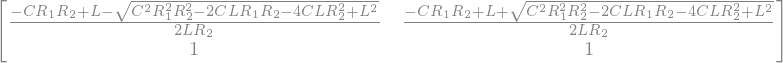

In [10]:
ss.M

### s-domain state transition matrix

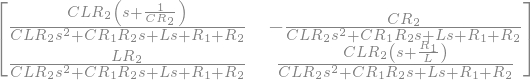

In [11]:
ss.Phi

### System transfer functions

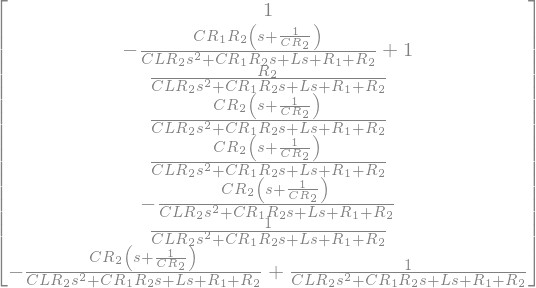

In [12]:
ss.G